In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [99]:
df = pd.read_csv('/content/cleaned_f1_data_New.csv')

In [100]:
df.head()

,Season,Round,Race Name,Date,Circuit,Country,Latitude,Longitude,Driver,Driver Nationality,...,Constructor,Constructor Nationality,Grid Position,Race Position,Points Earned,Fastest Lap (s),Fastest Lap Rank,Total Pit Stops,Race Laps Completed,Retirement Status
0,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Bob Gerard,British,...,ERA,British,13,6,0.0,93.053598,-1,-1,67,Finished
1,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Cuth Harrison,British,...,ERA,British,15,7,0.0,93.053598,-1,-1,67,Finished
2,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,David Hampshire,British,...,Maserati,Italian,16,9,0.0,93.053598,-1,-1,64,Finished
3,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Brian Shawe Taylor,British,...,Maserati,Italian,20,10,0.0,93.053598,-1,-1,64,Finished
4,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Joe Fry,British,...,Maserati,Italian,20,10,0.0,93.053598,-1,-1,64,Finished


In [101]:
to_drop = ['Driver Championship Points','Latitude', 'Longitude','Driver Experience (Years)', 'Driver Fastest Lap Time', 'Driver Fastest Lap Rank', 'Points Earned', 'Fastest Lap (s)', 'Fastest Lap Rank', 'Total Pit Stops','Date','Country','Driver Nationality','Round','Season']
df = df.drop(columns=to_drop, errors='ignore')
df.columns

Index(['Race Name', 'Circuit', 'Driver', 'Driver Age', 'Constructor',
       'Constructor Nationality', 'Grid Position', 'Race Position',
       'Race Laps Completed', 'Retirement Status'],
      dtype='object')

In [102]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Race Name', 'Circuit', 'Driver', 'Constructor',
       'Constructor Nationality', 'Retirement Status'],
      dtype='object')


In [103]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['Driver Age', 'Grid Position', 'Race Position', 'Race Laps Completed'], dtype='object')


In [104]:
def categorize_positions(df):
    # Create a new binary category column
    df['Finishers'] = ''


    df.loc[df['Race Position'] <= 8, 'Finishers'] = 'Top Finishers'
    df.loc[df['Race Position'] > 8, 'Finishers'] = 'Rest of the Grid'


    return df

In [105]:
df = categorize_positions(df)

In [106]:
df['Finishers'].value_counts()

,count
Finishers,
Rest of the Grid,3144
Top Finishers,472


In [107]:
Points_Category=["Rest of the Grid", "Top Finishers"]
MyOrdEncoder=OrdinalEncoder(categories=[Points_Category])
df["Finishers"]=MyOrdEncoder.fit_transform(df[["Finishers"]])
print(df)

                      Race Name                             Circuit  \
0            British Grand Prix                 Silverstone Circuit   
1            British Grand Prix                 Silverstone Circuit   
2            British Grand Prix                 Silverstone Circuit   
3            British Grand Prix                 Silverstone Circuit   
4            British Grand Prix                 Silverstone Circuit   
...                         ...                                 ...   
3611      Portuguese Grand Prix  Autódromo Internacional do Algarve   
3612          Monaco Grand Prix                   Circuit de Monaco   
3613   Saudi Arabian Grand Prix             Jeddah Corniche Circuit   
3614   Saudi Arabian Grand Prix             Jeddah Corniche Circuit   
3615  Emilia Romagna Grand Prix       Autodromo Enzo e Dino Ferrari   

                  Driver  Driver Age   Constructor Constructor Nationality  \
0             Bob Gerard          36           ERA                 Br

In [108]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)

categories_list = [df[col].unique().tolist() for col in categorical_cols]

encoder = OrdinalEncoder(categories=categories_list)
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

print(df.head())

Categorical Columns: ['Race Name', 'Circuit', 'Driver', 'Constructor', 'Constructor Nationality', 'Retirement Status']
   Race Name  Circuit  Driver  Driver Age  Constructor  \
0        0.0      0.0     0.0          36          0.0   
1        0.0      0.0     1.0          44          0.0   
2        0.0      0.0     2.0          33          1.0   
3        0.0      0.0     3.0          35          1.0   
4        0.0      0.0     4.0          35          1.0   

   Constructor Nationality  Grid Position  Race Position  Race Laps Completed  \
0                      0.0             13              6                   67   
1                      0.0             15              7                   67   
2                      1.0             16              9                   64   
3                      1.0             20             10                   64   
4                      1.0             20             10                   64   

   Retirement Status  Finishers  
0          

In [109]:
df.drop(['Race Position'], axis=1, inplace=True)

Logistic Regression

In [110]:
X = df.drop(['Finishers'], axis=1)
y = df['Finishers']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on test data
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8908839779005525
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       635
         1.0       0.55      0.58      0.57        89

    accuracy                           0.89       724
   macro avg       0.75      0.76      0.75       724
weighted avg       0.89      0.89      0.89       724



In [112]:
print("Training Features (X_train):")
print(X_train)
print("Shape:", X_train.shape)

print("\nTraining Labels (y_train):")
print(y_train)
print("Shape:", y_train.shape)

# Print testing set
print("\nTesting Features (X_test):")
print(X_test)
print("Shape:", X_test.shape)

print("\nTesting Labels (y_test):")
print(y_test)
print("Shape:", y_test.shape)

Training Features (X_train):
      Race Name  Circuit  Driver  Driver Age  Constructor  \
2592       11.0     22.0   425.0          31        125.0   
3216        6.0      7.0   473.0          28          5.0   
1228        4.0      4.0   262.0          28         42.0   
1234        7.0      8.0   306.0          26         87.0   
794         1.0      1.0   222.0          27         46.0   
...         ...      ...     ...         ...          ...   
1130       10.0     17.0   237.0          33         73.0   
1294        7.0      8.0   315.0          29         89.0   
860         8.0     11.0   261.0          28         70.0   
3507       10.0     28.0   509.0          22        114.0   
3174       17.0     13.0   482.0          24        134.0   

      Constructor Nationality  Grid Position  Race Laps Completed  \
2592                      5.0             17                   56   
3216                      1.0              4                    0   
1228                      0.0  

In [113]:
# Save training features
X_train.to_csv('X_train_R.csv', index=False)

# Save training labels
y_train.to_csv('y_train_R.csv', index=False)

# Save testing features
X_test.to_csv('X_test_R.csv', index=False)

# Save testing labels
y_test.to_csv('y_test_R.csv', index=False)


Confusion Matrix:
 [[593  42]
 [ 37  52]]


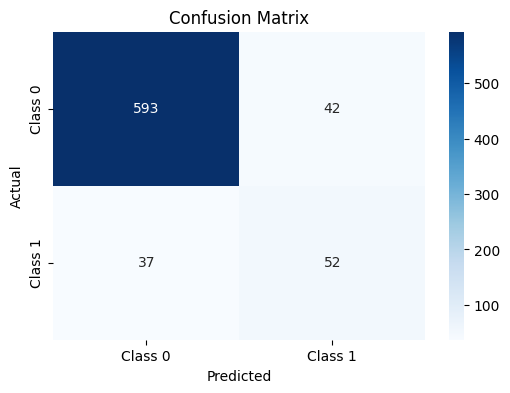

In [114]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

MultiNomial Naive Bayes Classification

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
mb_model = MultinomialNB()

# Train the model
mb_model.fit(X_train, y_train)

# Predict on test data
y_pred = mb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7182320441988951
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.73      0.82       635
         1.0       0.24      0.61      0.35        89

    accuracy                           0.72       724
   macro avg       0.59      0.67      0.58       724
weighted avg       0.85      0.72      0.76       724



Confusion Matrix:
 [[466 169]
 [ 35  54]]


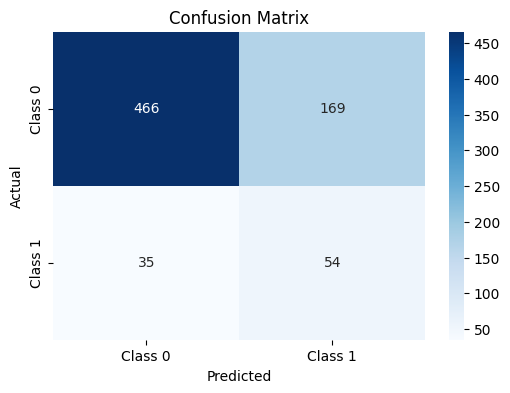

In [116]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()